In [21]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [22]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [23]:
# 550 data with 300 features
print(x_train.shape)
print(y_train.shape)

(550, 300)
(550,)


In [24]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [25]:
def cross_validation(x_train, y_train, k=5):
    sample_num = len(y_train)
    total_index = [i for i in range(sample_num)]
    np.random.shuffle(total_index)

    count = 0
    k_fold = []
    for i in range(k):
        if i < sample_num % k:
            num = sample_num//k+1
        else:
            num = sample_num//k

        valid_index = [total_index[j] for j in range(count, count+num)]
        valid_index.sort()
        valid_index = np.array(valid_index)
        train_index = np.array([j for j in range(sample_num) if j not in valid_index])
        dataset = [train_index, valid_index]
        k_fold.append(dataset)

        count += num

    return k_fold

In [26]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 55 # The number of data in each validation fold should equal to training data divieded by K

In [27]:
X = np.arange(20)
kf = cross_validation(X, X, 5)
kfold_data = []
for i, (train_index, val_index) in enumerate(kf):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 1  2  3  4  5  6  7  9 10 12 13 15 16 17 18 19], Validation index: [ 0  8 11 14]
Split: 2, Training index: [ 0  1  3  5  6  8  9 10 11 12 13 14 15 16 18 19], Validation index: [ 2  4  7 17]
Split: 3, Training index: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 17 18], Validation index: [ 3 15 16 19]
Split: 4, Training index: [ 0  2  3  4  5  7  8 11 12 13 14 15 16 17 18 19], Validation index: [ 1  6  9 10]
Split: 5, Training index: [ 0  1  2  3  4  6  7  8  9 10 11 14 15 16 17 19], Validation index: [ 5 12 13 18]


## example

In [28]:
from sklearn.model_selection import KFold
X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data = []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  4  6  7  8  9 11 12 13 14 15 17 19], Validation index: [ 5 10 16 18]
Split: 2, Training index: [ 0  1  4  5  6  7  9 10 11 13 14 15 16 17 18 19], Validation index: [ 2  3  8 12]
Split: 3, Training index: [ 0  1  2  3  4  5  6  7  8  9 10 12 14 16 17 18], Validation index: [11 13 15 19]
Split: 4, Training index: [ 2  3  4  5  6  7  8  9 10 11 12 13 15 16 18 19], Validation index: [ 0  1 14 17]
Split: 5, Training index: [ 0  1  2  3  5  8 10 11 12 13 14 15 16 17 18 19], Validation index: [4 6 7 9]


In [29]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C”, “kernel” and “gamma” to find the best parameters by cross-validation.

In [30]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.01)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.6927083333333334

In [31]:
C = [10**i for i in range(-2, 5)]
G = [10**i for i in range(-4, 4)]

In [32]:
# your code
def gridSearch(x_train, y_train, classify, k):
    best_score = 0
    score_table = np.zeros((7, 8))

    kfold_data = cross_validation(x_train, y_train, k)

    new_x_train = []
    new_y_train = []
    new_x_valid = []
    new_y_valid = []
    for i in range(k):
        new_x_train.append([x_train[j] for j in kfold_data[i][0]])
        new_y_train.append([y_train[j] for j in kfold_data[i][0]])
        new_x_valid.append([x_train[j] for j in kfold_data[i][1]])
        new_y_valid.append([y_train[j] for j in kfold_data[i][1]])

    for i in range(len(C)):
        for j in range(len(G)):
            if classify:
                clf = SVC(C=C[i], kernel='rbf', gamma=G[j])
            else:
                clf = SVR(C=C[i], kernel='rbf', gamma=G[j])

            total_score = []
            for x in range(k):
                clf.fit(new_x_train[x], new_y_train[x])
                total_score.append(clf.score(new_x_valid[x], new_y_valid[x]))
            score = np.mean(total_score)

            if score > best_score:
                best_score = score
                best_parameters = {"C": C[i], "Gamma": G[j]}
            score_table[i][j] = score

    return best_parameters, score_table

In [33]:
best_parameters, score_table = gridSearch(x_train, y_train, classify=1, k=5)

In [34]:
print(best_parameters)

{'C': 10, 'Gamma': 0.001}


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like the reference image ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

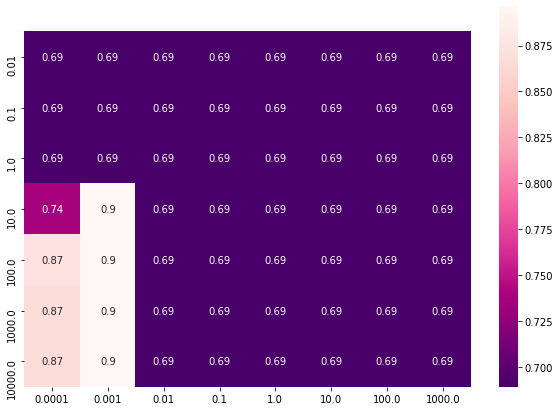

In [35]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

table = pd.DataFrame(score_table, index=C, columns=G)
plt.figure(figsize=(10, 7))
sn.heatmap(table, annot=True, cmap="RdPu_r")
plt.ylim(len(score_table), -0.5)
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set. **You accuracy should over 0.85**

In [36]:
best_model = SVC(C=best_parameters['C'], kernel='rbf', gamma=best_parameters['Gamma'])
best_model.fit(x_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

Accuracy score:  0.8958333333333334


## Question 5
Compare the performance of each model you have implemented from HW1

### HW1

In [48]:
train_df = pd.read_csv("../HW1/train_data.csv")
x_train = train_df['x_train'].to_numpy().reshape(-1, 1)
y_train = train_df['y_train'].to_numpy().reshape(-1, 1)

test_df = pd.read_csv("../HW1/test_data.csv")
x_test = test_df['x_test'].to_numpy().reshape(-1, 1)
y_test = test_df['y_test'].to_numpy().reshape(-1, 1)

In [49]:
def model(x_data):
    return [a*x + b for x in x_data]

In [50]:
def update_model():
    global a
    global b
    a = a - (10**-4)*(gradient_a)
    b = b - (10**-4)*(gradient_b)

In [51]:
a = 0.82
b = 0.79

for j in range(100):
    gradient_a = 0
    gradient_b = 0
    loss_data = 0
    y_pred = model(x_train)

    for i in range(len(x_train)):
        gradient_a = gradient_a + 2*(y_pred[i]-y_train[i])*x_train[i]
        gradient_b = gradient_b + 2*(y_pred[i]-y_train[i])
    gradient_a = gradient_a / 2
    gradient_b = gradient_b / 2

    update_model()

In [52]:
y_pred_HW1 = model(x_test)

HW4

In [53]:
best_parameters, score_table = gridSearch(x_train, y_train.T[0], classify=0, k=5)

In [54]:
best_model = SVR(C=best_parameters['C'], kernel='rbf', gamma=best_parameters['Gamma'])
best_model.fit(x_train, y_train.T[0])

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

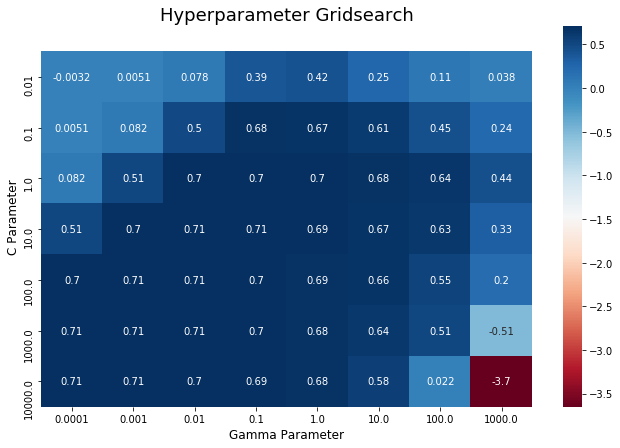

In [55]:
table = pd.DataFrame(score_table, index=C, columns=G)
fig, ax = plt.subplots(figsize=(11, 7))
ax.set_title('Hyperparameter Gridsearch', fontsize=18)
sn.heatmap(table, annot=True, cmap="RdBu")
ax.set_xlabel('Gamma Parameter', fontsize=12)
ax.set_ylabel('C Parameter', fontsize=12)
plt.ylim(len(score_table), -0.5)
plt.show()

In [56]:
y_pred_HW4 = best_model.predict(x_test)

Mean Square Errors

In [57]:
def get_MSE(y_pred, y_test):
    MSE = 0

    for i in range(len(y_test)):
        MSE = MSE + (y_pred[i]-y_test[i])**2
    MSE = MSE/len(y_test)

    return MSE

In [58]:
print("Square error of Linear regression: ", get_MSE(y_pred_HW1, y_test))
print("Square error of SVM regresssion model: ", get_MSE(y_pred_HW4, y_test))

Square error of Linear regression:  [0.06870391]
Square error of SVM regresssion model:  [0.07200437]
